##Importando dados e Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dados = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')
print(dados.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


##Normalizando e Juntandos os dados

In [ ]:
customer = pd.json_normalize(dados.customer)
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [ ]:
phone = pd.json_normalize(dados.phone)
phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
internet = pd.json_normalize(dados.internet)
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
#account = pd.DataFrame.from_dict(dados['account'].to_dict().values())
#charges = pd.DataFrame.from_dict(account['Charges'].to_dict().values())
#account = account.join(charges).drop('Charges', axis = 1)
account = pd.json_normalize(dados.account)
account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
dados = pd.concat([dados.customerID, dados.Churn,customer, phone, internet, account], axis = 'columns')
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##Conhecendo o DataSet

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
dados.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

##Verificação dos dados e suas possíveis inconsistências

###CustomerID

In [ ]:
dados.customerID.value_counts()
#Comprimento da série igual ao do dataset, logo não há IDs repetidos

0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: customerID, Length: 7267, dtype: int64

###Churn

In [ ]:
dados.Churn.value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

In [ ]:
#Como a análise busca saber o CHURN como resultado, logo, é interessante só ter as linhas que apresentem resultados de Sim ou Não para o Churn

dados = dados.query('Churn != ""')
dados.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

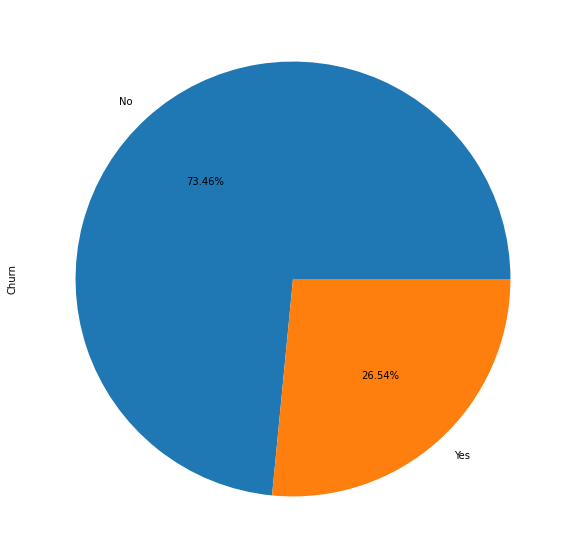

In [ ]:
#Vendo os mesmos dados em % temos que 73.46% são Não e 26.53 Sim

dados.Churn.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###gender

In [ ]:
dados.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

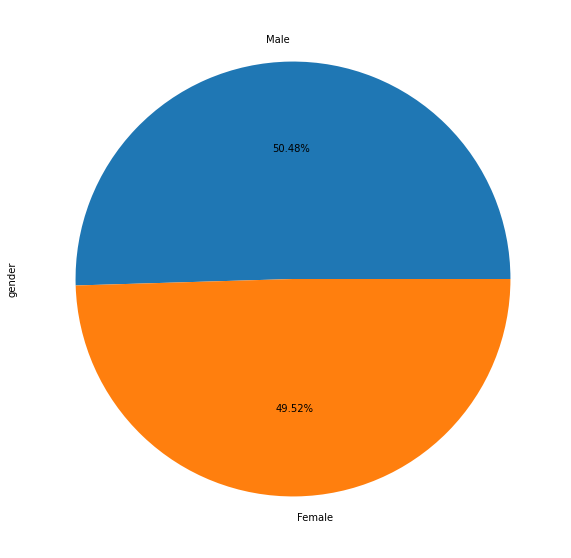

In [ ]:
dados.gender.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###SeniorCitizen

In [ ]:
dados.SeniorCitizen.value_counts()

#Talvez seja interessante modificar os valores 0 ou 1 para sim ou não, depende do trabalho que será executado posteriormente

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

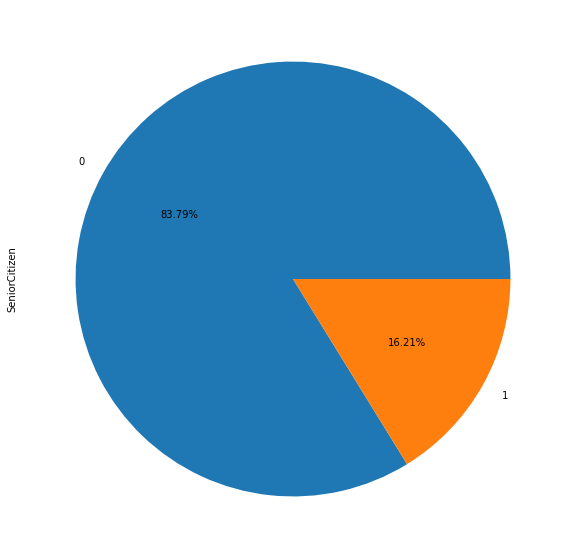

In [ ]:
dados.SeniorCitizen.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###Partner

In [ ]:
dados.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

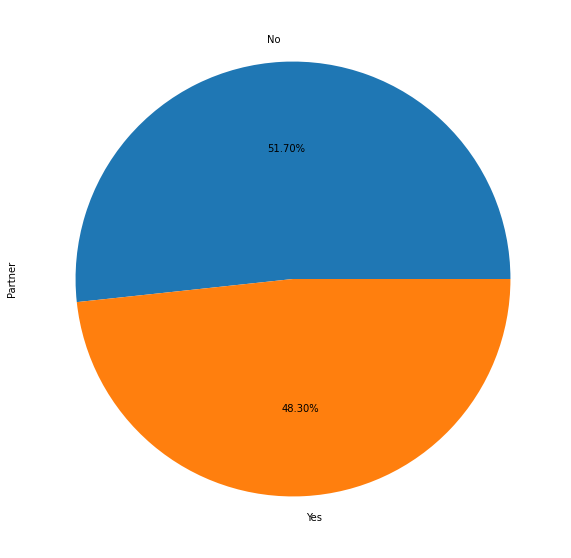

In [ ]:
dados.Partner.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###Dependents

In [ ]:
print(dados.Dependents.value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


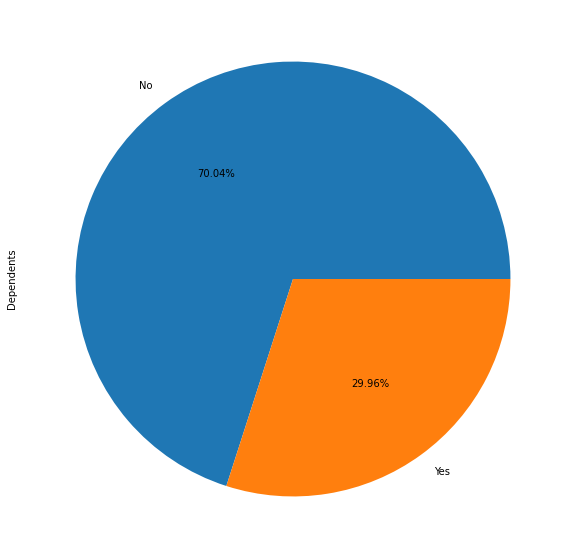

In [ ]:
dados.Dependents.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###tenure

In [ ]:
dados.tenure.describe().round(2)

#Interessante notar que 50% das pessoas analisadas possuem uma posse infeior a 29

count    7043.00
mean       32.37
std        24.56
min         0.00
25%         9.00
50%        29.00
75%        55.00
max        72.00
Name: tenure, dtype: float64

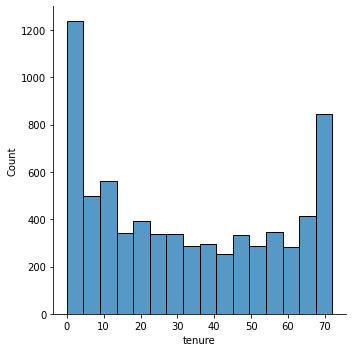

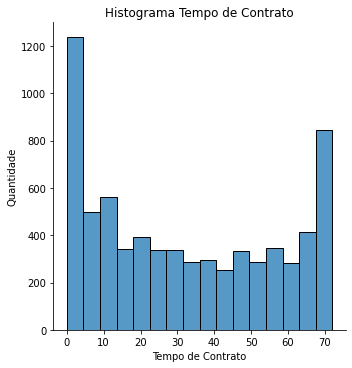

In [ ]:
sns.displot(dados.tenure)
ax = sns.displot(dados.tenure).set(title = 'Histograma Tempo de Contrato', xlabel = 'Tempo de Contrato', ylabel = 'Quantidade')
ax
plt.show()

###PhoneService

In [ ]:
dados.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

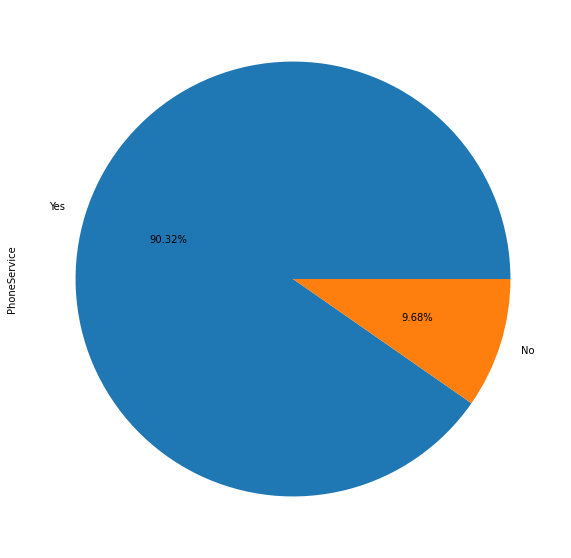

In [ ]:
dados.PhoneService.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###MultipleLines

In [ ]:
dados.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

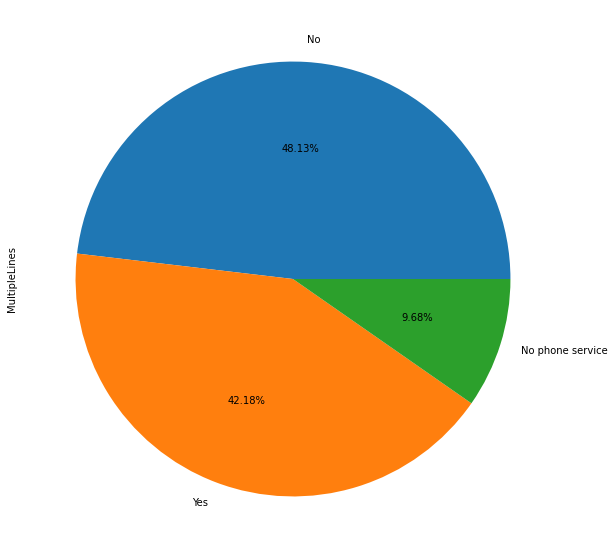

In [ ]:
dados.MultipleLines.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###InternetService

In [ ]:
dados.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

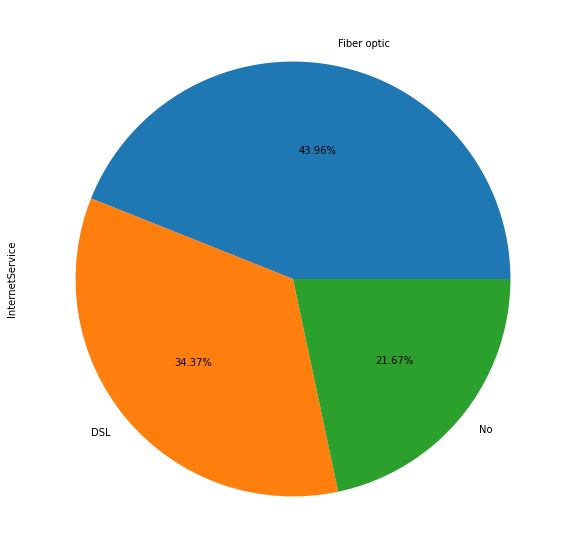

In [ ]:
dados.InternetService.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###OnlineSecurity

In [ ]:
dados.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

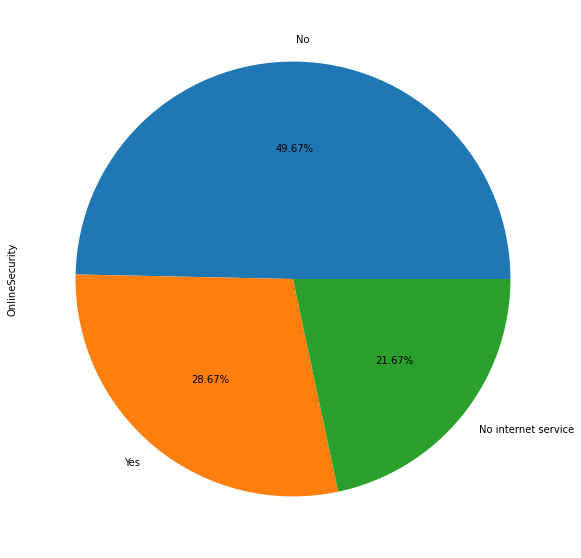

In [ ]:
dados.OnlineSecurity.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###OnlineBackup

In [ ]:
dados.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

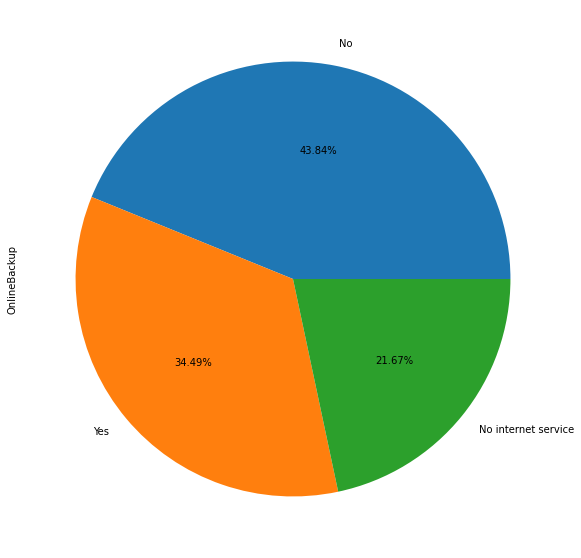

In [ ]:
dados.OnlineBackup.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###DeviceProtection

In [ ]:
dados.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

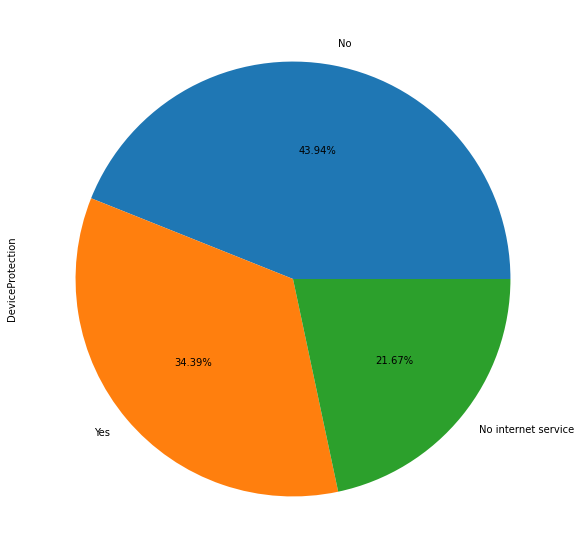

In [ ]:
dados.DeviceProtection.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###TechSupport

In [ ]:
dados.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

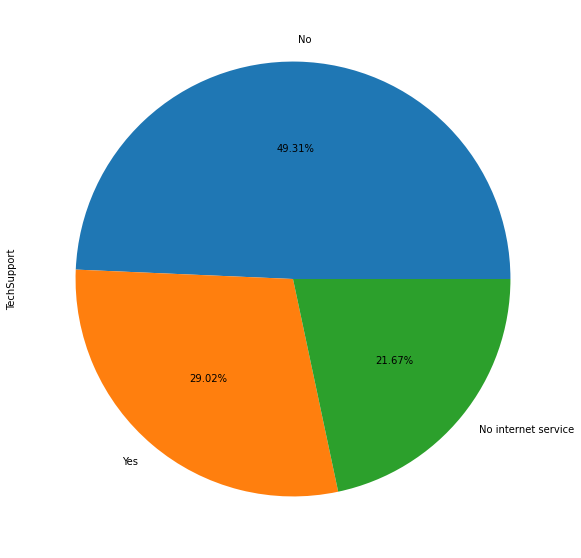

In [ ]:
dados.TechSupport.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###StreamingTV

In [ ]:
dados.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

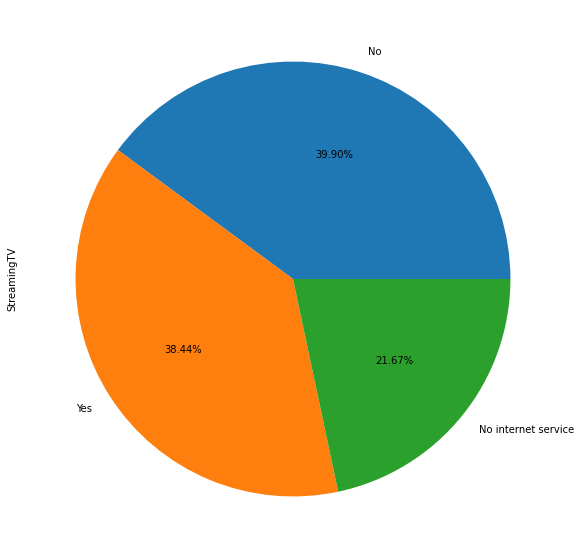

In [ ]:
dados.StreamingTV.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()


###StreamingMovies

In [ ]:
dados.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

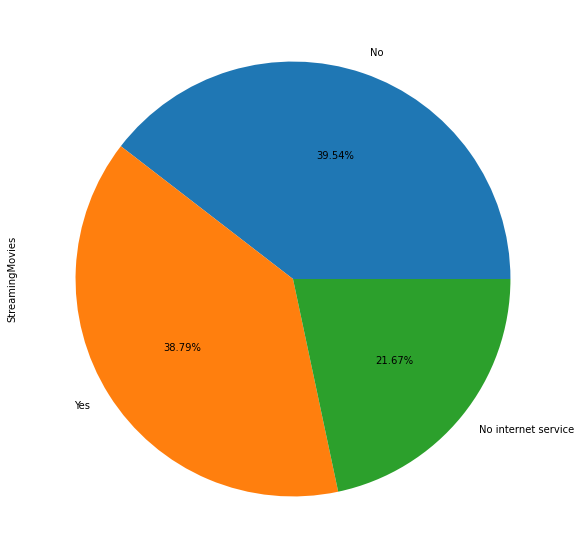

In [ ]:
dados.StreamingMovies.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###Contract

In [ ]:
dados.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

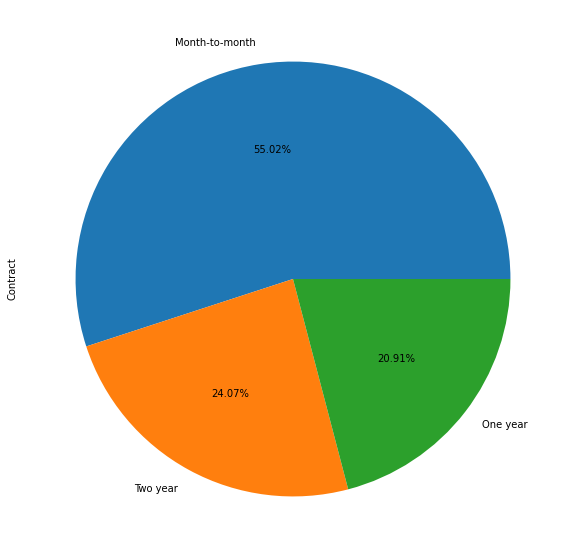

In [ ]:
dados.Contract.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###PaperlessBilling

In [ ]:
dados.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

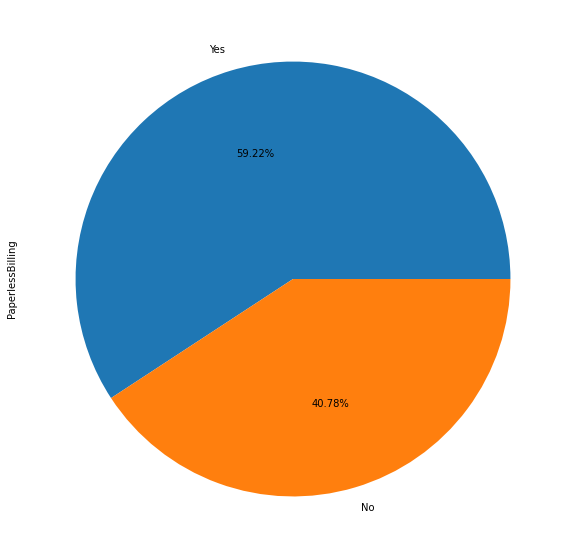

In [ ]:
dados.PaperlessBilling.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###PaymentMethod

In [ ]:
dados.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

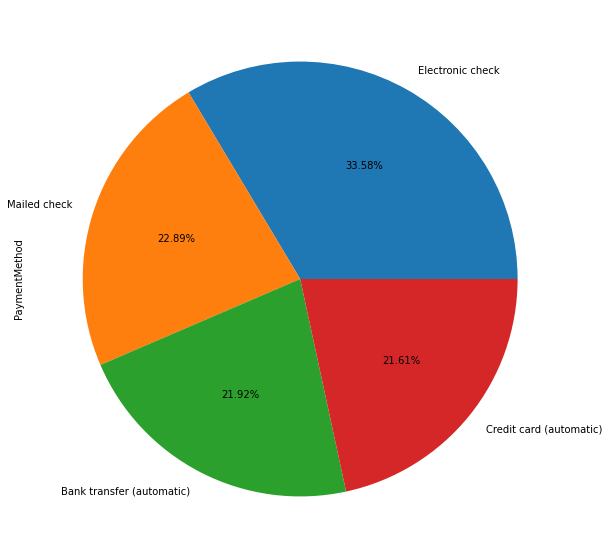

In [ ]:
dados.PaymentMethod.value_counts().plot(kind = 'pie', autopct = '%.2f%%', figsize = (20,10))
plt.show()

###Charges.Monthly

In [ ]:
dados['Charges.Monthly'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Charges.Monthly, dtype: float64

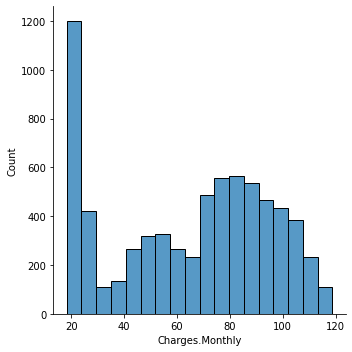

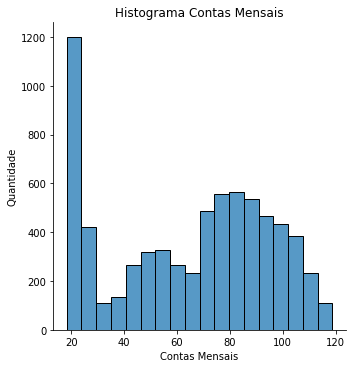

In [ ]:
sns.displot(dados['Charges.Monthly'])
ax = sns.displot(dados['Charges.Monthly']).set(title = 'Histograma Contas Mensais', xlabel = 'Contas Mensais', ylabel = 'Quantidade')
ax
plt.show()

###Charges.Total

In [ ]:
dados['Charges.Total'] = dados['Charges.Total'].apply(lambda x : np.nan if x == ' ' else float(x))
dados['Charges.Total'].isnull().sum()

11

In [ ]:
dados['Charges.Total'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: Charges.Total, dtype: float64

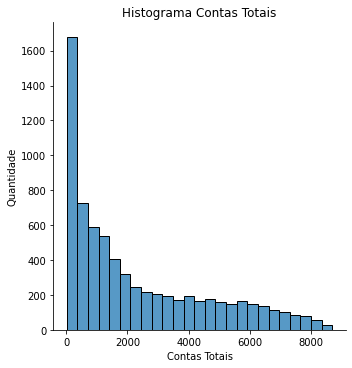

In [ ]:
ax = sns.displot(dados['Charges.Total']).set(title = 'Histograma Contas Totais', xlabel = 'Contas Totais', ylabel = 'Quantidade')
ax
plt.show()

##Tradução das colunas

In [ ]:
traducao = {'customerID': 'ID_Cliente', 'gender': 'Genero', 'SeniorCitizen': 'Idoso', 'Partner': 'Parceiro',
            'Dependents': 'Dependentes', 'tenure': 'Tempo_Contrato', 'PhoneService': 'Servico_Telefonico', 'MultipleLines': 'Multiplas_Linhas',
            'InternetService': 'Servico_Internet', 'OnlineSecurity': 'Seguranca_Online', 'OnlineBackup': 'Backup_Online', 'DeviceProtection': 'Protecao_Dispositivo',
            'TechSupport': 'Suporte_Tecnico', 'StreamingTV': 'Streaming_TV', 'StreamingMovies': 'Streaming_Filmes', 'Contract': 'Contrato', 'PaperlessBilling': 'Fatura_Online',
            'PaymentMethod': 'Metodo_Pagamento', 'Charges.Monthly': 'Contas_Mensais', 'Charges.Total': 'Contas_Totais'}
dados = dados.rename(columns = traducao)
dados.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Tempo_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Contas_Mensais,Contas_Totais
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


##Cálculo da contas diárias

In [ ]:
dados.insert(loc = 19, value = round(dados['Contas_Mensais']/30, 2), column = 'Contas_Diarias')
dados.head()

,ID_Cliente,Churn,Genero,Idoso,Parceiro,Dependentes,Tempo_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Contrato,Fatura_Online,Metodo_Pagamento,Contas_Diarias,Contas_Mensais,Contas_Totais
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


In [ ]:
dados['Contas_Diarias'].describe()

count    7043.000000
mean        2.158675
std         1.003088
min         0.610000
25%         1.180000
50%         2.340000
75%         2.990000
max         3.960000
Name: Contas_Diarias, dtype: float64

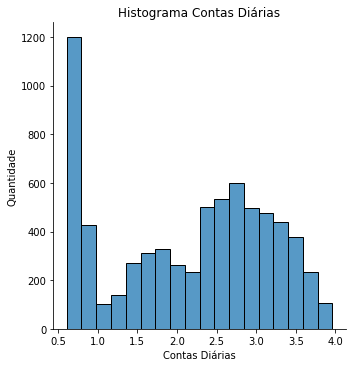

In [ ]:
ax = sns.displot(dados['Contas_Diarias']).set(title = 'Histograma Contas Diárias', xlabel = 'Contas Diárias', ylabel = 'Quantidade')
ax
plt.show()